In [1]:
from __future__ import print_function
import math
import os
import torch
import torch.distributions.constraints as constraints
import pyro
from pyro.optim import Adam
from pyro.infer import SVI, Trace_ELBO
import pyro.distributions as dist
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma

from sympy.interactive import printing
printing.init_printing()
torch.manual_seed(101)
pyro.set_rng_seed(1)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


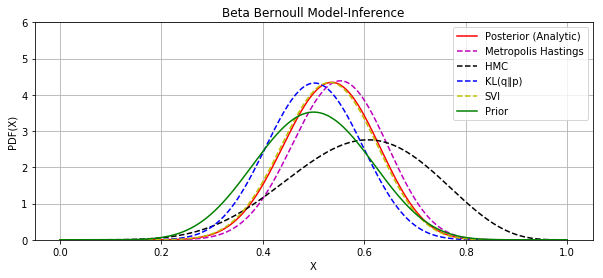

In [5]:
# Plot the analytic posterior
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(16,14).pdf(X), 'r');
ax.plot(X, stats.beta(16.7,13.7).pdf(X), 'm--');
ax.plot(X, stats.beta(7.03, 4.9).pdf(X), 'k--');
ax.plot(X, stats.beta(15, 14.9).pdf(X), 'b--');
ax.plot(X, stats.beta(15.9, 14.1).pdf(X), 'y--');
ax.plot(X, stats.beta(10, 10).pdf(X), 'g');
plt.grid()
plt.xlabel('X')
plt.ylabel('PDF(X)')
# Cleanup
ax.set(title='Beta Bernoull Model-Inference', ylim=(0,6))
ax.legend(['Posterior (Analytic)',  'Metropolis Hastings' ,'HMC','KL(q∥p)','SVI','Prior']);